In [1]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

# データ読み込み

In [2]:
# # train_df_temp_for_predictionはland_dataの特徴量を限定→欠損除去→販売間隔1日以上→登記日が2014~2018年→1万件抽出のデータ→バイナリ変数を作成
# train_df_temp_for_prediction = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\land_train_df_temp_for_prediction.csv")
# # test_df_for_predictionを読み込み
# test_df_for_prediction = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\land_test_df_for_prediction.csv")
land_data_for_prediction = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\land_data_for_prediction.csv")

In [3]:
land_data_for_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193448 entries, 0 to 1193447
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   size                1193448 non-null  float64
 1   population_density  1193448 non-null  float64
 2   month_sin           1193448 non-null  float64
 3   dummy_工業地域          1193448 non-null  float64
 4   dummy_工業専用地域        1193448 non-null  float64
 5   dummy_準住居地域         1193448 non-null  float64
 6   dummy_準工業地域         1193448 non-null  float64
 7   dummy_第一種中高層住居専用地域  1193448 non-null  float64
 8   dummy_第一種低層住居専用地域   1193448 non-null  float64
 9   dummy_第一種住居地域       1193448 non-null  float64
 10  dummy_第二種中高層住居専用地域  1193448 non-null  float64
 11  dummy_第二種低層住居専用地域   1193448 non-null  float64
 12  dummy_第二種住居地域       1193448 non-null  float64
 13  dummy_近隣商業地域        1193448 non-null  float64
 14  sales1_category     1193448 non-null  int64  
 15  binary_category

In [4]:
land_data_for_prediction['sales1_category'].value_counts()

sales1_category
8    633464
2     92337
3     83633
6     81888
1     77442
5     77342
4     74065
7     73277
Name: count, dtype: int64

# 順序ロジスティック回帰

In [28]:
X_train = land_data_for_prediction.drop(columns=['binary_category', 'sales1_category'])
# X_test = land_data_for_prediction.drop(columns=['binary_category', 'sales1_category'])
Y_train = land_data_for_prediction['sales1_category']
# Y_test = land_data_for_prediction['sales1_category']



==== 評価結果 ====
Accuracy: 0.2108
MAE     : 1.6126
RMSE    : 2.0749

==== 混同行列 ====
           予測:～1カ月  予測:1～3カ月  予測:3～5カ月  予測:5～7カ月  予測:7～9カ月  予測:9～12カ月
実際:～1カ月       3158     45651         0         0         0          0
実際:1～3カ月      2378     57990         0         0         0          0
実際:3～5カ月      1647     54971         0         0         0          0
実際:5～7カ月      1130     49264         0         0         0          0
実際:7～9カ月       733     36701         0         0         0          0
実際:9～12カ月      794     35622         0         0         0          0


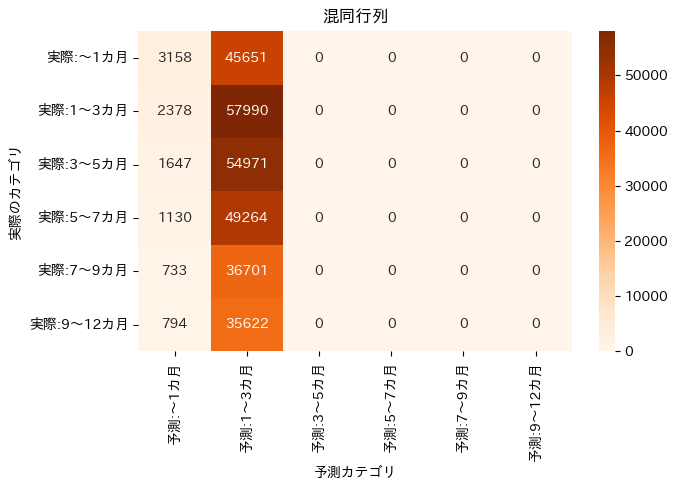

In [12]:
from collections import Counter
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error, confusion_matrix
from statsmodels.miscmodels.ordinal_model import OrderedModel


# ====== 7. モデル構築と学習 ======
model = OrderedModel(Y_train, X_train, distr='logit')
result = model.fit(method='bfgs', disp=False)

# ====== 8. 予測（出力は0始まりなので+1）======
pred_probs = result.predict(X_test)
y_pred = pred_probs.idxmax(axis=1).astype(int) + 1

# ====== 9. 評価指標の計算 ======
accuracy = accuracy_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

print("\n==== 評価結果 ====")
print(f"Accuracy: {accuracy:.4f}")
print(f"MAE     : {mae:.4f}")
print(f"RMSE    : {rmse:.4f}")

# ====== 10. 混同行列の可視化 ======
# category_labels = {
#         1: '～1カ月', 2: '1〜3カ月', 3: '3〜5カ月', 4: '5〜7カ月', 5: '7〜9カ月', 6: '9〜12カ月'
# }
category_labels = {
        1: '～1カ月', 2: '1～3カ月', 3: '3～5カ月', 4: '5～7カ月', 5: '7～9カ月', 6: '9～12カ月'
}
# y_trainとy_testのユニークな値を取得
y_all = pd.concat([Y_train, Y_test])
unique_labels = sorted(y_all.unique())

cm = confusion_matrix(Y_test, y_pred, labels=unique_labels)
cm_df = pd.DataFrame(cm,
    index=[f"実際:{category_labels[i]}" for i in unique_labels],
    columns=[f"予測:{category_labels[i]}" for i in unique_labels]
)

print("\n==== 混同行列 ====")
print(cm_df)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Oranges')
plt.title("混同行列")
plt.xlabel("予測カテゴリ")
plt.ylabel("実際のカテゴリ")
plt.tight_layout()
plt.show()


In [29]:
len(X_train)

559984

In [38]:
X_train_temp = X_train[:200000]
Y_train_temp = Y_train[:200000]

In [40]:
# 1万件で1分，2万件で2.5分，5.5万件で5分ちょいかかる
from collections import Counter
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error, confusion_matrix
from statsmodels.miscmodels.ordinal_model import OrderedModel


# ====== 7. モデル構築と学習 ======
model = OrderedModel(Y_train, X_train, distr='logit')
result = model.fit(method='bfgs', disp=True)

Optimization terminated successfully.
         Current function value: 1.938610
         Iterations: 92
         Function evaluations: 93
         Gradient evaluations: 93


In [13]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:        sales1_category   Log-Likelihood:            -2.4121e+05
Model:                   OrderedModel   AIC:                         4.825e+05
Method:            Maximum Likelihood   BIC:                         4.827e+05
Date:                Wed, 18 Jun 2025                                         
Time:                        02:47:08                                         
No. Observations:              137443                                         
Df Residuals:                  137424                                         
Df Model:                          14                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
size                  -0.1611      0.007    -23.614      0.000      -0.175      -0.148
population_density    -0.0639      0.005    -12.381      0.000      -0.074      -0.054
month_sin              0.0390      0.007      5.859      0.000       0.026       0.052
dummy_工業地域            -0.0275      0.039     -0.703      0.482      -0.104       0.049
dummy_工業専用地域          -0.2692      0.121     -2.216      0.027      -0.507      -0.031
dummy_準住居地域            0.0956      0.037      2.567      0.010       0.023       0.169
dummy_準工業地域           -0.0136      0.020     -0.676      0.499      -0.053       0.026
dummy_第一種中高層住居専用地域     0.1042      0.019      5.565      0.000       0.067       0.141
dummy_第一種低層住居専用地域      0.1171      0.017      6.847      0.000       0.084       0.151
dummy_第一種住居地域          0.0756      0.018      4.106      0.000       0.040       0.112
dummy_第二種中高層住居専用地域    -0.0377      0.027     -1.416      0.157      -0.090       0.014
dummy_第二種低層住居専用地域     -0.3258      0.051     -6.376      0.000      -0.426      -0.226
dummy_第二種住居地域          0.1181      0.033      3.540      0.000       0.053       0.183
dummy_近隣商業地域           0.1164      0.021      5.467      0.000       0.075       0.158
1.0/2.0               -1.2856      0.015    -86.094      0.000      -1.315      -1.256
2.0/3.0                0.0723      0.005     13.761      0.000       0.062       0.083
3.0/4.0               -0.2961      0.006    -50.660      0.000      -0.308      -0.285
4.0/5.0               -0.3109      0.006    -48.002      0.000      -0.324      -0.298
5.0/6.0               -0.2041      0.008    -26.430      0.000      -0.219      -0.189
======================================================================================
"""

In [56]:
# ====== 11. モデルの保存 ======
import pickle
# モデルを保存
with open(r"D:\fujiwara\M\land_model.pkl", 'wb') as f:
    pickle.dump(result, f)

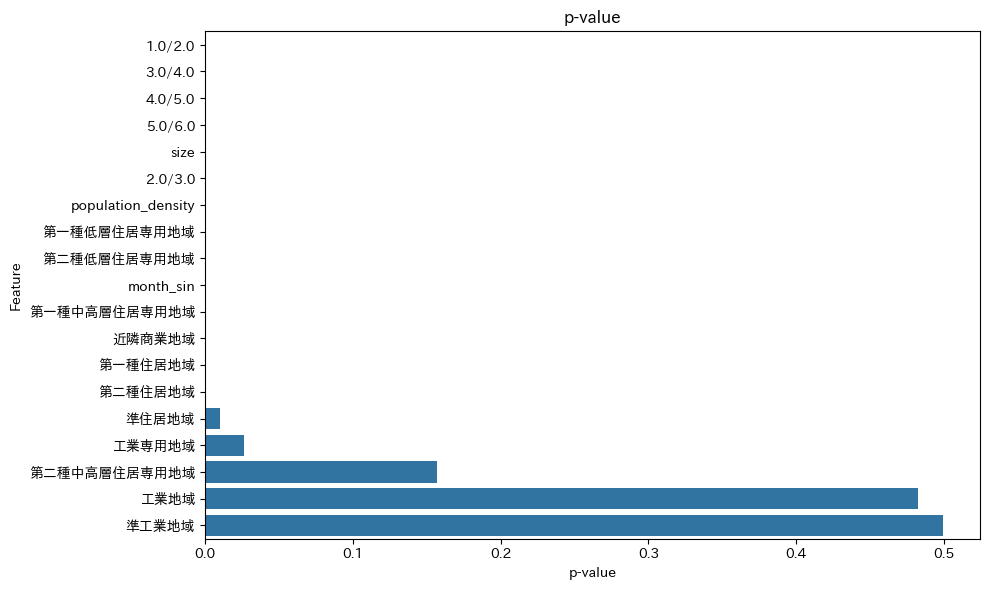

In [16]:
# p値を図で表示
p_values = result.pvalues
p_values_df = pd.DataFrame(p_values, columns=['p-value'])
p_values_df = p_values_df.reset_index()
p_values_df.columns = ['Feature', 'p-value']
p_values_df['Feature'] = p_values_df['Feature'].astype(str)
p_values_df['Feature'] = p_values_df['Feature'].str.replace('dummy_', '')
p_values_df['Feature'] = p_values_df['Feature'].str.replace('use_district_', '')
p_values_df = p_values_df.sort_values(by='p-value', ascending=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='p-value', y='Feature', data=p_values_df)
plt.title("p-value")
plt.xlabel("p-value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


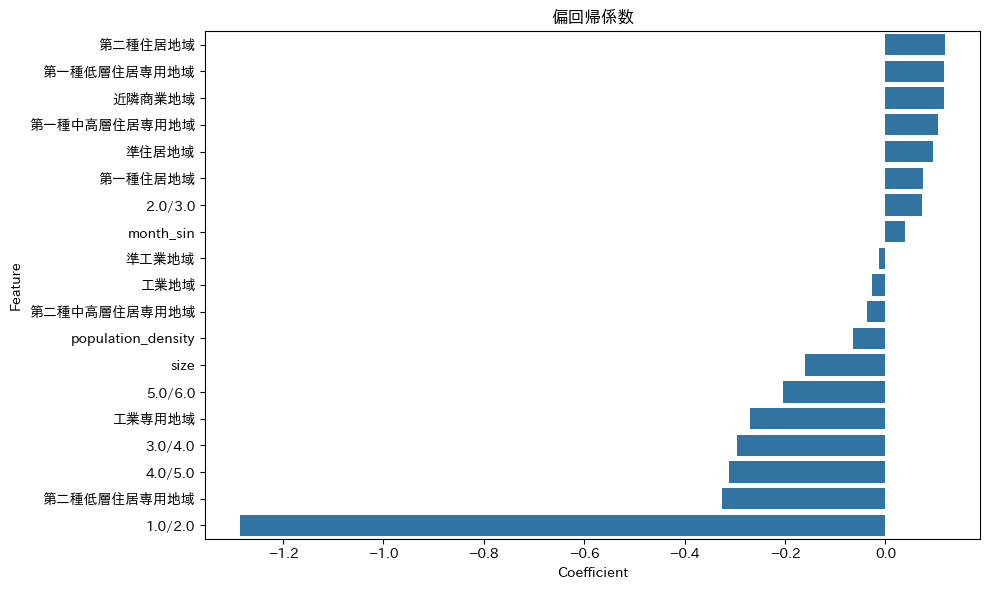

In [17]:
# 偏回帰係数を図で表示
coef = result.params
coef_df = pd.DataFrame(coef, columns=['Coefficient'])
coef_df = coef_df.reset_index()
coef_df.columns = ['Feature', 'Coefficient']
coef_df['Feature'] = coef_df['Feature'].astype(str)
coef_df['Feature'] = coef_df['Feature'].str.replace('dummy_', '')
coef_df['Feature'] = coef_df['Feature'].str.replace('use_district_', '')
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("偏回帰係数")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()